In [2]:

import csv
from tabulate import tabulate

def read_text_file(text_file):
    transitions = {}
    with open(text_file, 'r') as file:
        for _ in range(6):  # Skip metadata lines
            next(file)
        reader = csv.reader(file, delimiter=' ')
        for row in reader:
            if len(row) < 4:
                continue
            state = int(row[0])
            input_val = row[1]
            output = row[3]
            new_state = int(row[2])
            transitions[(state, input_val)] = (output, new_state)
    return transitions

def simulate_fsm(transitions, current_state, input_val):
    key = (current_state, input_val)
    if key in transitions:
        output, new_state = transitions[key]
        return output, new_state
    else:
        return None, None

def print_transitions_dict(transitions):
    print("Transitions (Dictionary Format):")
    for key, value in transitions.items():
        print(f"From State {key[0]} with Input {key[1]} -> Output {value[0]}, New State {value[1]}")

def print_transitions_table(transitions):
    table = []
    headers = ["Current State", "Input", "Output", "New State"]
    for (state, input_val), (output, new_state) in transitions.items():
        table.append([state, input_val, output, new_state])
    print(tabulate(table, headers=headers, tablefmt="grid"))

def save_transitions_to_csv(transitions, filename):
    with open(filename, 'w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(["Current State", "Input", "Output", "New State"])
        for (state, input_val), (output, new_state) in transitions.items():
            writer.writerow([state, input_val, output, new_state])

def main():
    text_file = 'C:\\Users\\youse\\OneDrive - aus.edu\\Desktop\\Computer Vision\\SoftwareTesting\\CD_reduced_fsm.txt'
    transitions = read_text_file(text_file)
    print("Transitions Loaded:")
    print_transitions_dict(transitions)
    print_transitions_table(transitions)

    # Saving transitions to a CSV file
    csv_filename = 'C:\\Users\\youse\\OneDrive - aus.edu\\Desktop\\Computer Vision\\SoftwareTesting\\test.csv'
    save_transitions_to_csv(transitions, csv_filename)
    print(f"Transitions saved to CSV file at {csv_filename}\n")

    current_state = 0  # Initialize current state
    print("Starting FSM simulation...\n")
    while True:
        user_input = input("Enter input to the FSM (or 'exit' to quit): ")
        if user_input.lower() == 'exit':
            print("Exiting FSM simulation.")
            break

        output, new_state = simulate_fsm(transitions, current_state, user_input)
        if output is not None and new_state is not None:
            print("\nTransition Details:")
            print(f"Current State: {current_state}")
            print(f"Input: {user_input}")
            print(f"Output: {output}")
            print(f"New State: {new_state}\n")
            current_state = new_state
        else:
            print("Invalid input or transition not defined.")

if __name__ == "__main__":
    main()





Transitions Loaded:
Transitions (Dictionary Format):
From State 0 with Input 0 -> Output 0, New State 1
From State 0 with Input 1 -> Output 1, New State 0
From State 0 with Input 2 -> Output 1, New State 0
From State 0 with Input 3 -> Output 1, New State 0
From State 0 with Input 4 -> Output 4, New State 0
From State 0 with Input 5 -> Output 4, New State 0
From State 0 with Input 6 -> Output 4, New State 0
From State 1 with Input 0 -> Output 1, New State 0
From State 1 with Input 1 -> Output 0, New State 1
From State 1 with Input 2 -> Output 0, New State 3
From State 1 with Input 3 -> Output 2, New State 2
From State 1 with Input 4 -> Output 3, New State 4
From State 1 with Input 5 -> Output 1, New State 0
From State 1 with Input 6 -> Output 4, New State 1
From State 2 with Input 0 -> Output 1, New State 0
From State 2 with Input 1 -> Output 2, New State 2
From State 2 with Input 2 -> Output 2, New State 5
From State 2 with Input 3 -> Output 3, New State 4
From State 2 with Input 4 -> 

Exiting FSM simulation.


In [3]:
import random
import copy

def parse_fsm_config(filepath):
    """ Parses FSM configuration from a file. """
    fsm_config = {'transitions': []}
    with open(filepath, 'r') as file:
        for line in file:
            parts = line.strip().split()
            if len(parts) == 2 and parts[0] != 'F':
                fsm_config[parts[0]] = int(parts[1])
            elif len(parts) == 4:
                fsm_config['transitions'].append((int(parts[0]), int(parts[1]), int(parts[2]), int(parts[3])))
    return fsm_config

def generate_mutants(fsm_config, num_mutants, mutations_per_mutant):
    """ Generates mutants of the FSM by introducing multiple faults per mutant. """
    mutants = []
    states = list(set([t[2] for t in fsm_config['transitions']]))
    outputs = list(set([t[3] for t in fsm_config['transitions']]))

    for i in range(num_mutants):
        mutant = copy.deepcopy(fsm_config)
        mutations = random.sample(mutant['transitions'], mutations_per_mutant)
        for mutation in mutations:
            index = mutant['transitions'].index(mutation)
            mutation_type = random.choice(['state', 'output'])

            if mutation_type == 'state':
                possible_states = [s for s in states if s != mutation[2]]
                if possible_states:
                    new_state = random.choice(possible_states)
                    print(f"Mutant {i+1}: Transition {mutation} - Changed state from {mutation[2]} to {new_state}")
                    mutation = (mutation[0], mutation[1], new_state, mutation[3])
            else:
                possible_outputs = [o for o in outputs if o != mutation[3]]
                if possible_outputs:
                    new_output = random.choice(possible_outputs)
                    print(f"Mutant {i+1}: Transition {mutation} - Changed output from {mutation[3]} to {new_output}")
                    mutation = (mutation[0], mutation[1], mutation[2], new_output)

            mutant['transitions'][index] = mutation
        mutants.append(mutant)

    return mutants

def save_mutants_to_file(mutants, filepath):
    """ Saves mutants to a file in the specified FSM format. """
    with open(filepath, 'w') as file:

        for i, mutant in enumerate(mutants, start=1):
            file.write(f"F 0\n")
            file.write(f"s {mutant['s']}\n")
            file.write(f"i {mutant['i']}\n")
            file.write(f"o {mutant['o']}\n")
            file.write(f"n0 {mutant['n0']}\n")
            file.write(f"p {len(mutant['transitions'])}\n")
            for transition in mutant['transitions']:
                file.write(f"{transition[0]} {transition[1]} {transition[2]} {transition[3]}\n")
            file.write("\n")  # Optionally separate each mutant block with an empty line

fsm_config = parse_fsm_config('C:\\Users\\youse\\OneDrive - aus.edu\\Desktop\\Computer Vision\\SoftwareTesting\\CD_reduced_fsm.txt')  # Update with the actual path to your FSM configuration file
num_mutants = 1000  # Specify the number of mutants you want to generate
mutations_per_mutant = 1 # Specify the number of faults per mutant
mutants = generate_mutants(fsm_config, num_mutants, mutations_per_mutant)
save_mutants_to_file(mutants, 'mutants.txt')  # Save the mutants to a text file



Mutant 1: Transition (0, 2, 0, 1) - Changed state from 0 to 12
Mutant 2: Transition (15, 1, 13, 3) - Changed state from 13 to 3
Mutant 3: Transition (1, 6, 1, 4) - Changed state from 1 to 6
Mutant 4: Transition (10, 0, 0, 1) - Changed output from 1 to 4
Mutant 5: Transition (1, 3, 2, 2) - Changed state from 2 to 14
Mutant 6: Transition (12, 2, 12, 4) - Changed output from 4 to 0
Mutant 7: Transition (10, 3, 8, 2) - Changed output from 2 to 3
Mutant 8: Transition (6, 1, 3, 0) - Changed state from 3 to 11
Mutant 9: Transition (6, 2, 9, 0) - Changed output from 0 to 3
Mutant 10: Transition (2, 3, 4, 3) - Changed output from 3 to 1
Mutant 11: Transition (5, 0, 0, 1) - Changed output from 1 to 4
Mutant 12: Transition (8, 4, 10, 3) - Changed output from 3 to 0
Mutant 13: Transition (4, 6, 1, 0) - Changed state from 1 to 2
Mutant 14: Transition (1, 3, 2, 2) - Changed output from 2 to 4
Mutant 15: Transition (15, 0, 0, 1) - Changed output from 1 to 3
Mutant 16: Transition (13, 2, 15, 3) - Chan

In [4]:
import copy


#this part will simulate the mutants with the given inputs then compare the output responses of each mutant
#wit another and remove the mutants that are the same.



def parse_fsm_configurations(filepath):
    """ Parses FSM configurations, assuming each is separated by a blank line. """
    fsm_configs = []
    current_fsm = {'transitions': []}
    with open(filepath, 'r') as file:
        content = file.read().strip()
    fsms = content.split('\n\n')  # Split on blank lines
    for fsm_data in fsms:
        fsm = {'transitions': []}
        lines = fsm_data.split('\n')
        for line in lines:
            if line:
                parts = line.strip().split()
                if len(parts) == 2 and parts[0] in ['s', 'i', 'o', 'n0', 'p']:
                    fsm[parts[0]] = int(parts[1])
                elif len(parts) == 4:
                    fsm['transitions'].append(tuple(map(int, parts)))
        fsm_configs.append(fsm)
    return fsm_configs

def parse_test_suites(filepath):
    """ Parses test suites into lists of inputs, ignoring expected outputs. """
    test_suites = []
    with open(filepath, 'r') as file:
        for line in file:
            inputs = [int(pair.split('/')[0]) for pair in line.strip().split()]
            test_suites.append(inputs)
    return test_suites

def simulate_fsm(fsm, inputs):
    """ Simulates an FSM given a sequence of inputs, returning the outputs as a tuple. """
    current_state = 0  # Assuming initial state is always 0
    outputs = []
    for input in inputs:
        output = 'No transition'
        for state, inp, next_state, out in fsm['transitions']:
            if state == current_state and inp == input:
                current_state = next_state
                output = out
                break
        outputs.append(output)
    return tuple(outputs)  # Convert list to tuple for hashability

def filter_unique_fsms(fsm_configs, test_suites):
    """ Compares FSMs based on their output responses and filters out duplicates, reporting which were removed. """
    output_patterns = {}
    unique_fsms = []
    equivalent_fsms = {}  # Stores indices of FSMs that are duplicates

    for index, fsm in enumerate(fsm_configs):
        outputs = tuple(simulate_fsm(fsm, inputs) for inputs in test_suites)
        if outputs not in output_patterns:
            output_patterns[outputs] = index
            unique_fsms.append(fsm)
        else:
            # If the output pattern already exists, add this FSM's index to the list of duplicates
            original_index = output_patterns[outputs]
            if original_index not in equivalent_fsms:
                equivalent_fsms[original_index] = []
            equivalent_fsms[original_index].append(index)

    return unique_fsms, equivalent_fsms

# File paths
fsm_filepath = 'C:\\Users\\youse\\OneDrive - aus.edu\\Desktop\\Computer Vision\\SoftwareTesting\\mutants.txt'
test_suite_filepath = 'C:\\Users\\youse\\OneDrive - aus.edu\\Desktop\\Computer Vision\\SoftwareTesting\\CD\\Hm_n.txt'

# Processing
fsm_configs = parse_fsm_configurations(fsm_filepath)
test_suites = parse_test_suites(test_suite_filepath)
unique_fsms, equivalent_fsms = filter_unique_fsms(fsm_configs, test_suites)

# Output the results
print(f"Number of unique FSMs: {len(unique_fsms)}")
for idx, fsm in enumerate(unique_fsms):
    print(f"Unique FSM {idx + 1}: Transitions {fsm['transitions']}")

# Print information about equivalent FSMs
print("\nList of equivalent FSMs:")
for original_idx, duplicate_idxs in equivalent_fsms.items():
    duplicates = ', '.join(f"FSM {idx + 1}" for idx in duplicate_idxs)
    print(f"FSM {original_idx + 1} is equivalent to: {duplicates}")



    #edit this to show which exact mutants where removed


Number of unique FSMs: 599
Unique FSM 1: Transitions [(0, 0, 1, 0), (0, 1, 0, 1), (0, 2, 12, 1), (0, 3, 0, 1), (0, 4, 0, 4), (0, 5, 0, 4), (0, 6, 0, 4), (1, 0, 0, 1), (1, 1, 1, 0), (1, 2, 3, 0), (1, 3, 2, 2), (1, 4, 4, 3), (1, 5, 0, 1), (1, 6, 1, 4), (2, 0, 0, 1), (2, 1, 2, 2), (2, 2, 5, 2), (2, 3, 4, 3), (2, 4, 4, 3), (2, 5, 0, 1), (2, 6, 1, 0), (3, 0, 0, 1), (3, 1, 1, 0), (3, 2, 6, 0), (3, 3, 5, 2), (3, 4, 7, 3), (3, 5, 0, 1), (3, 6, 3, 4), (4, 0, 0, 1), (4, 1, 4, 3), (4, 2, 7, 3), (4, 3, 2, 2), (4, 4, 7, 3), (4, 5, 0, 1), (4, 6, 1, 0), (5, 0, 0, 1), (5, 1, 2, 2), (5, 2, 8, 2), (5, 3, 7, 3), (5, 4, 7, 3), (5, 5, 0, 1), (5, 6, 3, 0), (6, 0, 0, 1), (6, 1, 3, 0), (6, 2, 9, 0), (6, 3, 8, 2), (6, 4, 10, 3), (6, 5, 0, 1), (6, 6, 6, 4), (7, 0, 0, 1), (7, 1, 4, 3), (7, 2, 10, 3), (7, 3, 5, 2), (7, 4, 10, 3), (7, 5, 0, 1), (7, 6, 3, 0), (8, 0, 0, 1), (8, 1, 5, 2), (8, 2, 11, 2), (8, 3, 10, 3), (8, 4, 10, 3), (8, 5, 0, 1), (8, 6, 6, 0), (9, 0, 0, 1), (9, 1, 6, 0), (9, 2, 12, 0), (9, 3, 11, 2),

In [5]:
import os

def evaluate_test_suites(fsm_configs, test_suite_paths):
    """ Evaluates each test suite's effectiveness in identifying unique FSMs. """
    results = {}
    for path in test_suite_paths:
        test_suites = parse_test_suites(path)
        unique_fsms, equivalent_fsms = filter_unique_fsms(fsm_configs, test_suites)
        # Calculate the effectiveness
        total_mutants = len(fsm_configs)
        num_equivalents = sum(len(dups) for dups in equivalent_fsms.values())
        percentage_killed = (num_equivalents / total_mutants) * 100 if total_mutants > 0 else 0
        results[path] = percentage_killed
    return results

def main():
    fsm_filepath = 'C:\\Users\\youse\\OneDrive - aus.edu\\Desktop\\Computer Vision\\SoftwareTesting\\mutants.txt'  # Path to FSM configurations
    test_suite_folder = 'C:\\Users\\youse\\OneDrive - aus.edu\\Desktop\\Computer Vision\\SoftwareTesting\\CD'  # Folder containing all test suite files

    # Load all FSM configurations
    fsm_configs = parse_fsm_configurations(fsm_filepath)

    # List all test suite files
    test_suite_paths = [os.path.join(test_suite_folder, f) for f in os.listdir(test_suite_folder) if f.endswith('.txt')]

    # Evaluate each test suite
    evaluation_results = evaluate_test_suites(fsm_configs, test_suite_paths)

    # Output the results
    for path, percentage in evaluation_results.items():
        print(f"Test suite {path} identified {percentage:.2f}% equivalent mutants.")

if __name__ == "__main__":
    main()


Test suite C:\Users\youse\OneDrive - aus.edu\Desktop\Computer Vision\SoftwareTesting\CD\Hm_n+1.txt identified 40.10% equivalent mutants.
Test suite C:\Users\youse\OneDrive - aus.edu\Desktop\Computer Vision\SoftwareTesting\CD\Hm_n.txt identified 40.10% equivalent mutants.
Test suite C:\Users\youse\OneDrive - aus.edu\Desktop\Computer Vision\SoftwareTesting\CD\HSIm_n+1.txt identified 32.70% equivalent mutants.
Test suite C:\Users\youse\OneDrive - aus.edu\Desktop\Computer Vision\SoftwareTesting\CD\HSIm_n.txt identified 40.10% equivalent mutants.
Test suite C:\Users\youse\OneDrive - aus.edu\Desktop\Computer Vision\SoftwareTesting\CD\Wm_n+1.txt identified 30.00% equivalent mutants.
Test suite C:\Users\youse\OneDrive - aus.edu\Desktop\Computer Vision\SoftwareTesting\CD\Wm_n.txt identified 30.00% equivalent mutants.


Test suite Hm_n+1.txt identified 40.10% equivalent mutants.
Test suite Hm_n.txt identified 40.10% equivalent mutants.
Test suite HSIm_n+1.txt identified 32.70% equivalent mutants.
Test suite HSIm_n.txt identified 40.10% equivalent mutants.
Test suite Wm_n+1.txt identified 30.00% equivalent mutants.
Test suite Wm_n.txt identified 30.00% equivalent mutants.


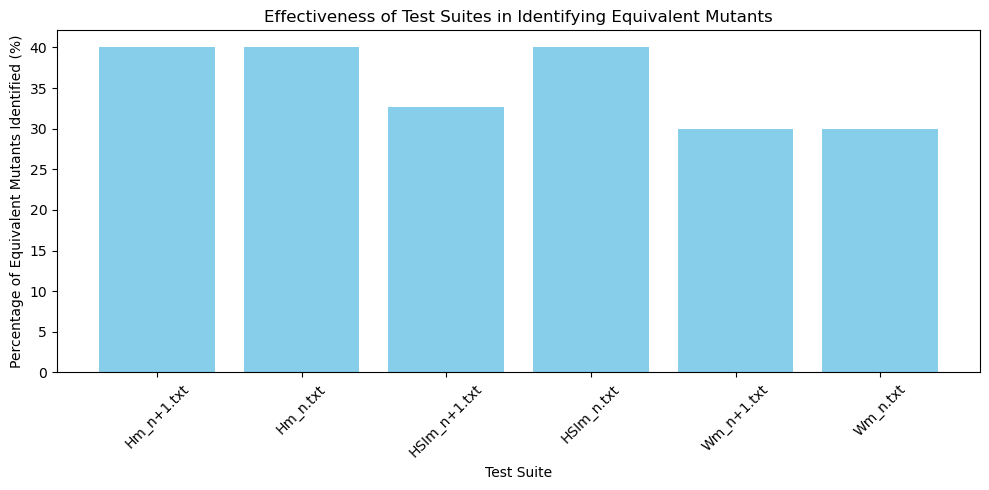

In [6]:
import os
import matplotlib.pyplot as plt

def evaluate_test_suites(fsm_configs, test_suite_paths):
    """ Evaluates each test suite's effectiveness in identifying unique FSMs. """
    results = {}
    for path in test_suite_paths:
        test_suites = parse_test_suites(path)
        unique_fsms, equivalent_fsms = filter_unique_fsms(fsm_configs, test_suites)
        # Calculate the effectiveness
        total_mutants = len(fsm_configs)
        num_equivalents = sum(len(dups) for dups in equivalent_fsms.values())
        percentage_killed = (num_equivalents / total_mutants) * 100 if total_mutants > 0 else 0
        results[path] = percentage_killed
    return results

def plot_results(results):
    """ Plots the results of test suite evaluations. """
    # Prepare data
    names = [os.path.basename(path) for path in results.keys()]
    values = list(results.values())

    # Plotting
    plt.figure(figsize=(10, 5))
    plt.bar(names, values, color='skyblue')
    plt.xlabel('Test Suite')
    plt.ylabel('Percentage of Equivalent Mutants Identified (%)')
    plt.title('Effectiveness of Test Suites in Identifying Equivalent Mutants')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def main():
    fsm_filepath = "C:\\Users\\youse\\OneDrive - aus.edu\\Desktop\\Computer Vision\\SoftwareTesting\\mutants.txt"  # Path to FSM configurations
    test_suite_folder = 'C:\\Users\\youse\\OneDrive - aus.edu\\Desktop\\Computer Vision\\SoftwareTesting\\CD'  # Folder containing all test suite files

    # Load all FSM configurations
    fsm_configs = parse_fsm_configurations(fsm_filepath)

    # List all test suite files
    test_suite_paths = [os.path.join(test_suite_folder, f) for f in os.listdir(test_suite_folder) if f.endswith('.txt')]

    # Evaluate each test suite
    evaluation_results = evaluate_test_suites(fsm_configs, test_suite_paths)

    # Output the results
    for path, percentage in evaluation_results.items():
        print(f"Test suite {os.path.basename(path)} identified {percentage:.2f}% equivalent mutants.")

    # Plot the results
    plot_results(evaluation_results)

if __name__ == "__main__":
    main()
